## Life Expecantcy and GDP 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

LE_GDP_data = pd.read_csv("all_data.csv")
LE_GDP_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
country_data = LE_GDP_data.sort_values("Year")
country_count= LE_GDP_data["Country"].nunique()
country_list = list(LE_GDP_data["Country"].unique())
country_list

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

In [4]:
years = list(LE_GDP_data["Year"].unique())

In [5]:
LE_GDP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [6]:
LE_GDP_data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [7]:
LE_GDP_data.GDP = LE_GDP_data.GDP * 10**-9
LE_GDP_data.rename(columns={"GDP":"GDP (10^9)"}, inplace=True)
LE_GDP_data.rename(columns={"Life expectancy at birth (years)":"Life Expec"}, inplace=True)
LE_GDP_data['Country'] = LE_GDP_data['Country'].replace("United States of America", "USA")
LE_GDP_data["GDP (10^9)"] = LE_GDP_data["GDP (10^9)"].round(3) 

In [8]:
LE_GDP_data.head()

,Country,Year,Life Expec,GDP (10^9)
0,Chile,2000,77.3,77.861
1,Chile,2001,77.3,70.980
2,Chile,2002,77.8,69.737
3,Chile,2003,77.9,75.643
4,Chile,2004,78.0,99.210


### EDA

#### Relative comparison of each country's factors.

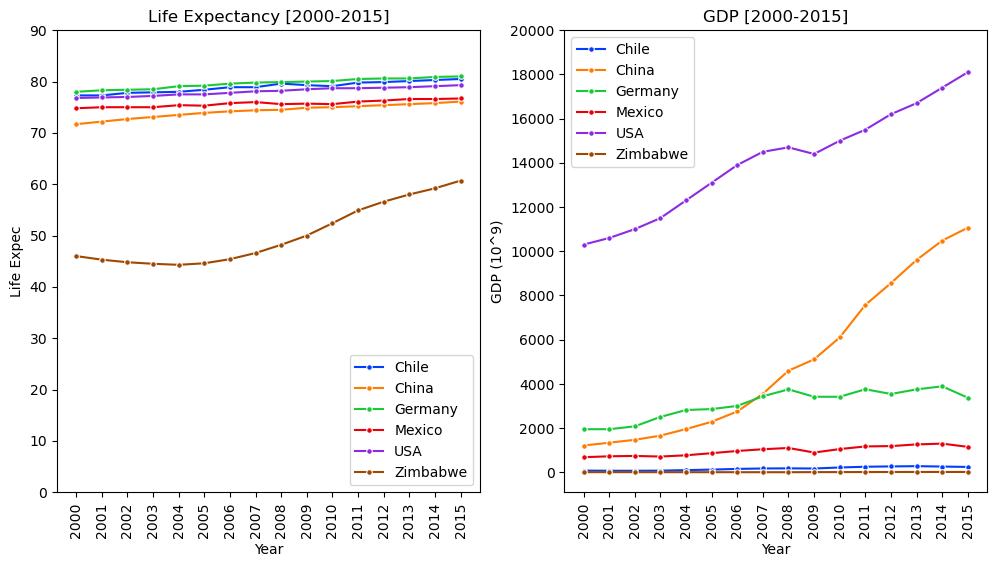

In [9]:
x = LE_GDP_data["Year"]
y1 = LE_GDP_data["Life Expec"]
y2 = LE_GDP_data["GDP (10^9)"]
z = LE_GDP_data["Country"]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.lineplot(x=x, y=y1, hue=z, palette="bright", data=LE_GDP_data, markers=True, marker="o", markersize=4)
plt.title("Life Expectancy [2000-2015]")
plt.xticks(years, rotation=90)
plt.yticks(list(range(0, 100, 10)))
plt.legend(loc="lower right")

plt.subplot(1,2,2)
sns.lineplot(x=x, y=y2, hue=z, palette="bright", data=LE_GDP_data, markers=True, marker="o", markersize=4)
plt.title("GDP [2000-2015]")
plt.xticks(years, rotation=90)
plt.yticks(list(range(0, int(y2.max())+2000, 2000)))
plt.legend(loc="upper left")
plt.show()

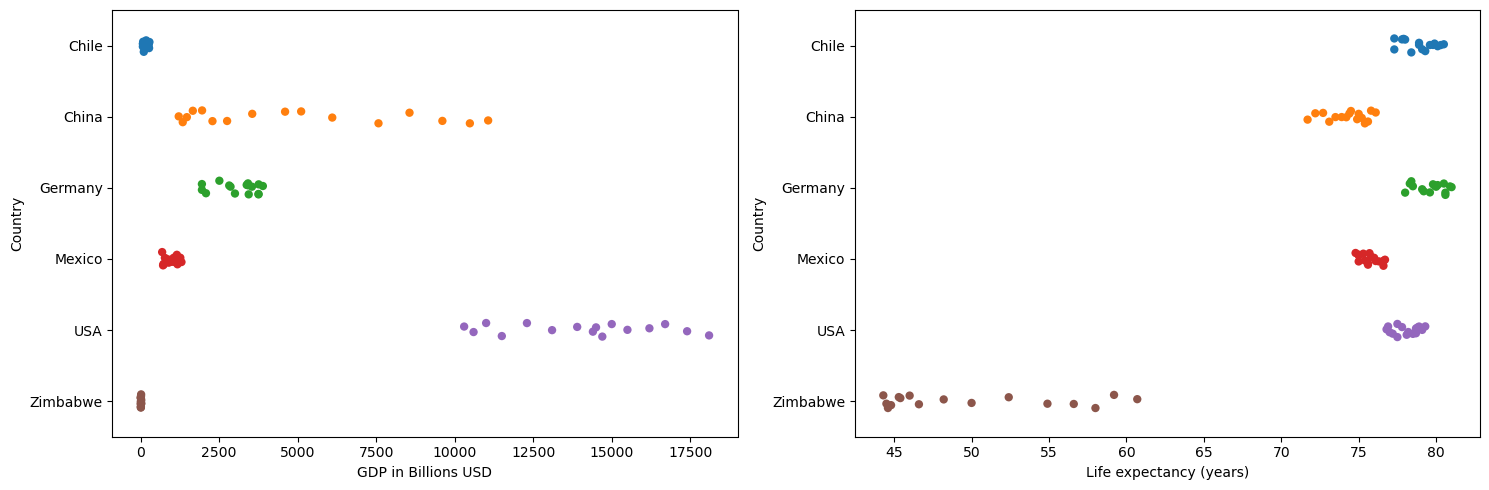

<Figure size 640x480 with 0 Axes>

In [44]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.stripplot(x=LE_GDP_data["GDP (10^9)"], y=LE_GDP_data["Country"], hue=LE_GDP_data["Country"], size=6)
plt.xlabel("GDP in Billions USD")
plt.subplot(1,2,2)
sns.stripplot(x=LE_GDP_data["Life Expec"], y=LE_GDP_data["Country"], hue=LE_GDP_data["Country"], size=6)
plt.xlabel("Life expectancy (years)")
plt.tight_layout()
plt.show()
plt.clf()

#### Evaluation: Relative comparison graphs
##### Life Expectance
-> From these combined Life Expectancy graphs we can see that the life expectancy is very similar for all the countries, in the 70-80 age range and are increasing similarly at a stable rate. This is all except Zimbabwe which is significantly lower life expectancy ranging from 40-60. 
##### GDP
->The largest GDPs are USA, China and Germany. The graph shows that USA has consistently had a greater GDP score than other countries with a high percentage increase across the years. China's GDP has increased the most throughout this time. Germany is the third largest with an $1000x10^9. The other countries have lower GDP's with increases in valuation over the years. 
This is a clear visualisation of the scale difference between the economies of different countries. 
##### Comparison
Look at the combined graph, Zimbabwe and Chile have very similar GDPs over this time period, their Life expectancy values are significantly different. Chile has a similar life expectancy to Germany and USA and yet these three countries have significantly different GDP scores. This leads us to believe that there is no clear corelation between GDP and Life Expectancy of various counties.


#### Indivdual evaluation of each country's factors 

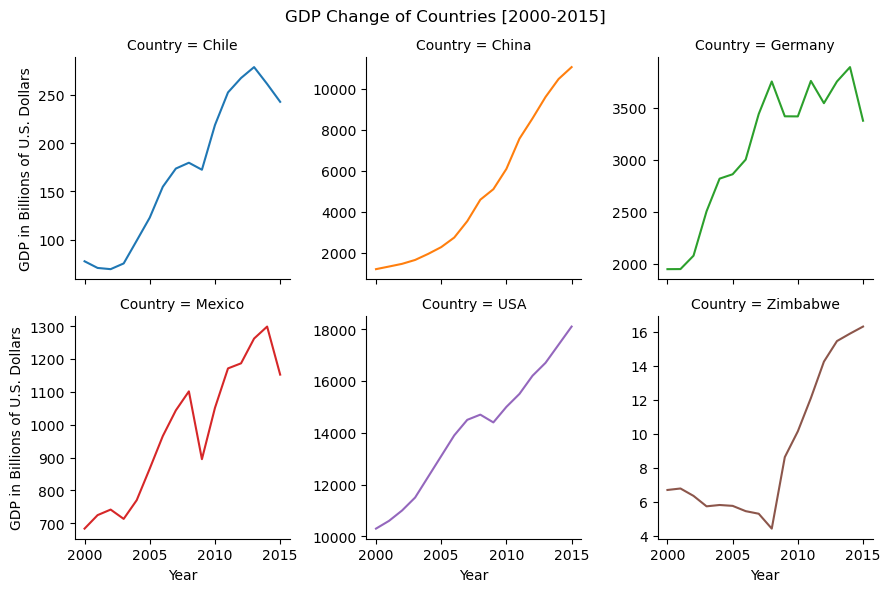

In [52]:
GDP_fmap = sns.FacetGrid(LE_GDP_data, col="Country", col_wrap=3, hue = "Country", sharey = False)
GDP_fmap = (GDP_fmap.map(sns.lineplot,"Year","GDP (10^9)").set_axis_labels("Year","GDP in Billions of U.S. Dollars"))

GDP_fmap.fig.subplots_adjust(top=0.9)
GDP_fmap.fig.suptitle('GDP Change of Countries [2000-2015]')
GDP_fmap;

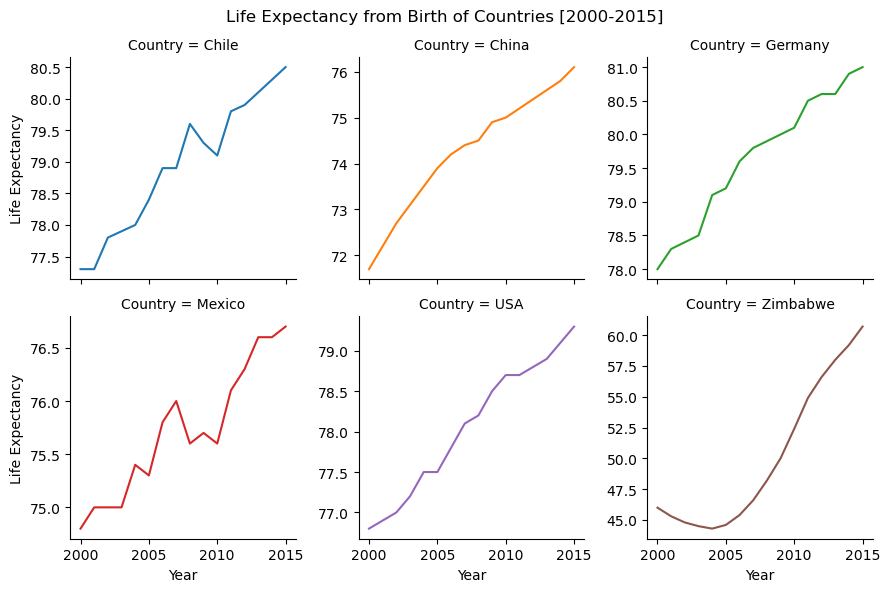

In [12]:
GDP_fmap = sns.FacetGrid(LE_GDP_data, col="Country", col_wrap=3, hue = "Country", sharey = False)
GDP_fmap = (GDP_fmap.map(sns.lineplot,"Year","Life Expec").set_axis_labels("Year","Life Expectancy"))

GDP_fmap.fig.subplots_adjust(top=0.9)
GDP_fmap.fig.suptitle('Life Expectancy from Birth of Countries [2000-2015]')            
GDP_fmap;

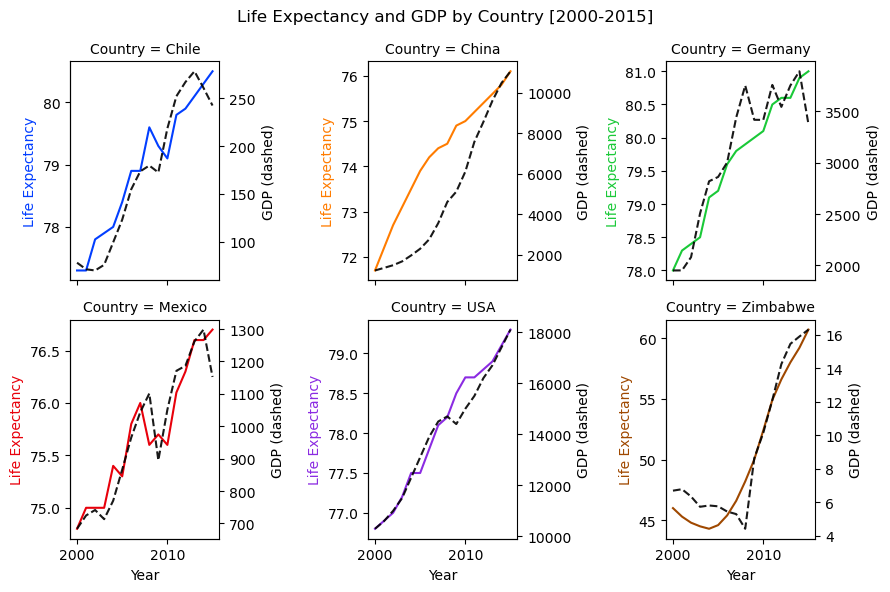

In [84]:
# FacetGrid for Life Expectancy
GDP_fmap = sns.FacetGrid(LE_GDP_data, col="Country", col_wrap=3, hue="Country", palette="bright", sharey=False)
GDP_fmap = GDP_fmap.map(sns.lineplot, "Year", "Life Expec")
GDP_fmap.set_axis_labels("Year", "Life Expectancy")

# Add GDP as third axis for each subplot
for i, ax in enumerate(GDP_fmap.axes.flat):
    country = GDP_fmap.col_names[i]
    line_color = ax.lines[0].get_color()   ##### This allows us to extract  the colour of that graph!! #####
    ax.set_ylabel('Life Expectancy', color=line_color)
    ax2 = ax.twinx()
    country_data = LE_GDP_data[LE_GDP_data['Country'] == country]
    
    ax2.plot(country_data['Year'], country_data['GDP (10^9)'],'k--', alpha=0.9)
    ax2.set_ylabel('GDP (dashed)') # GDP in billions still
    ax2.tick_params(axis='y')

# Title
GDP_fmap.fig.subplots_adjust(top=0.9, right=0.85)
GDP_fmap.fig.suptitle('Life Expectancy and GDP by Country [2000-2015]')

plt.tight_layout()

#### Evaluation: Individual graphs
##### Life Expectance
The individual graphs show that Life expectancy is increasing in all countries in a positive linear trend. This consistency, even if not at the same scale shows a similarity in each countries trend. 
##### GDP
When plotted individually this shows significantly different tale than when the countries were plotted together. Instead of being relative to each other the country’s GDP these graphs show relative induvial changes which shows a consistent story of positive linear increase of GDP for each country.
##### Comparison overlay
-> The overlay of the GDP and life expectancy shows a clear link between GDP and life expectancy for countries. USA and Mexico are particularly strong corelations, but all countries show very similar overlays when GDP and life expectancy of individual countries are overlayed on a graph. This would lead us to believe there must be some link between the two factors


#### GDP vs Life Expectancy 

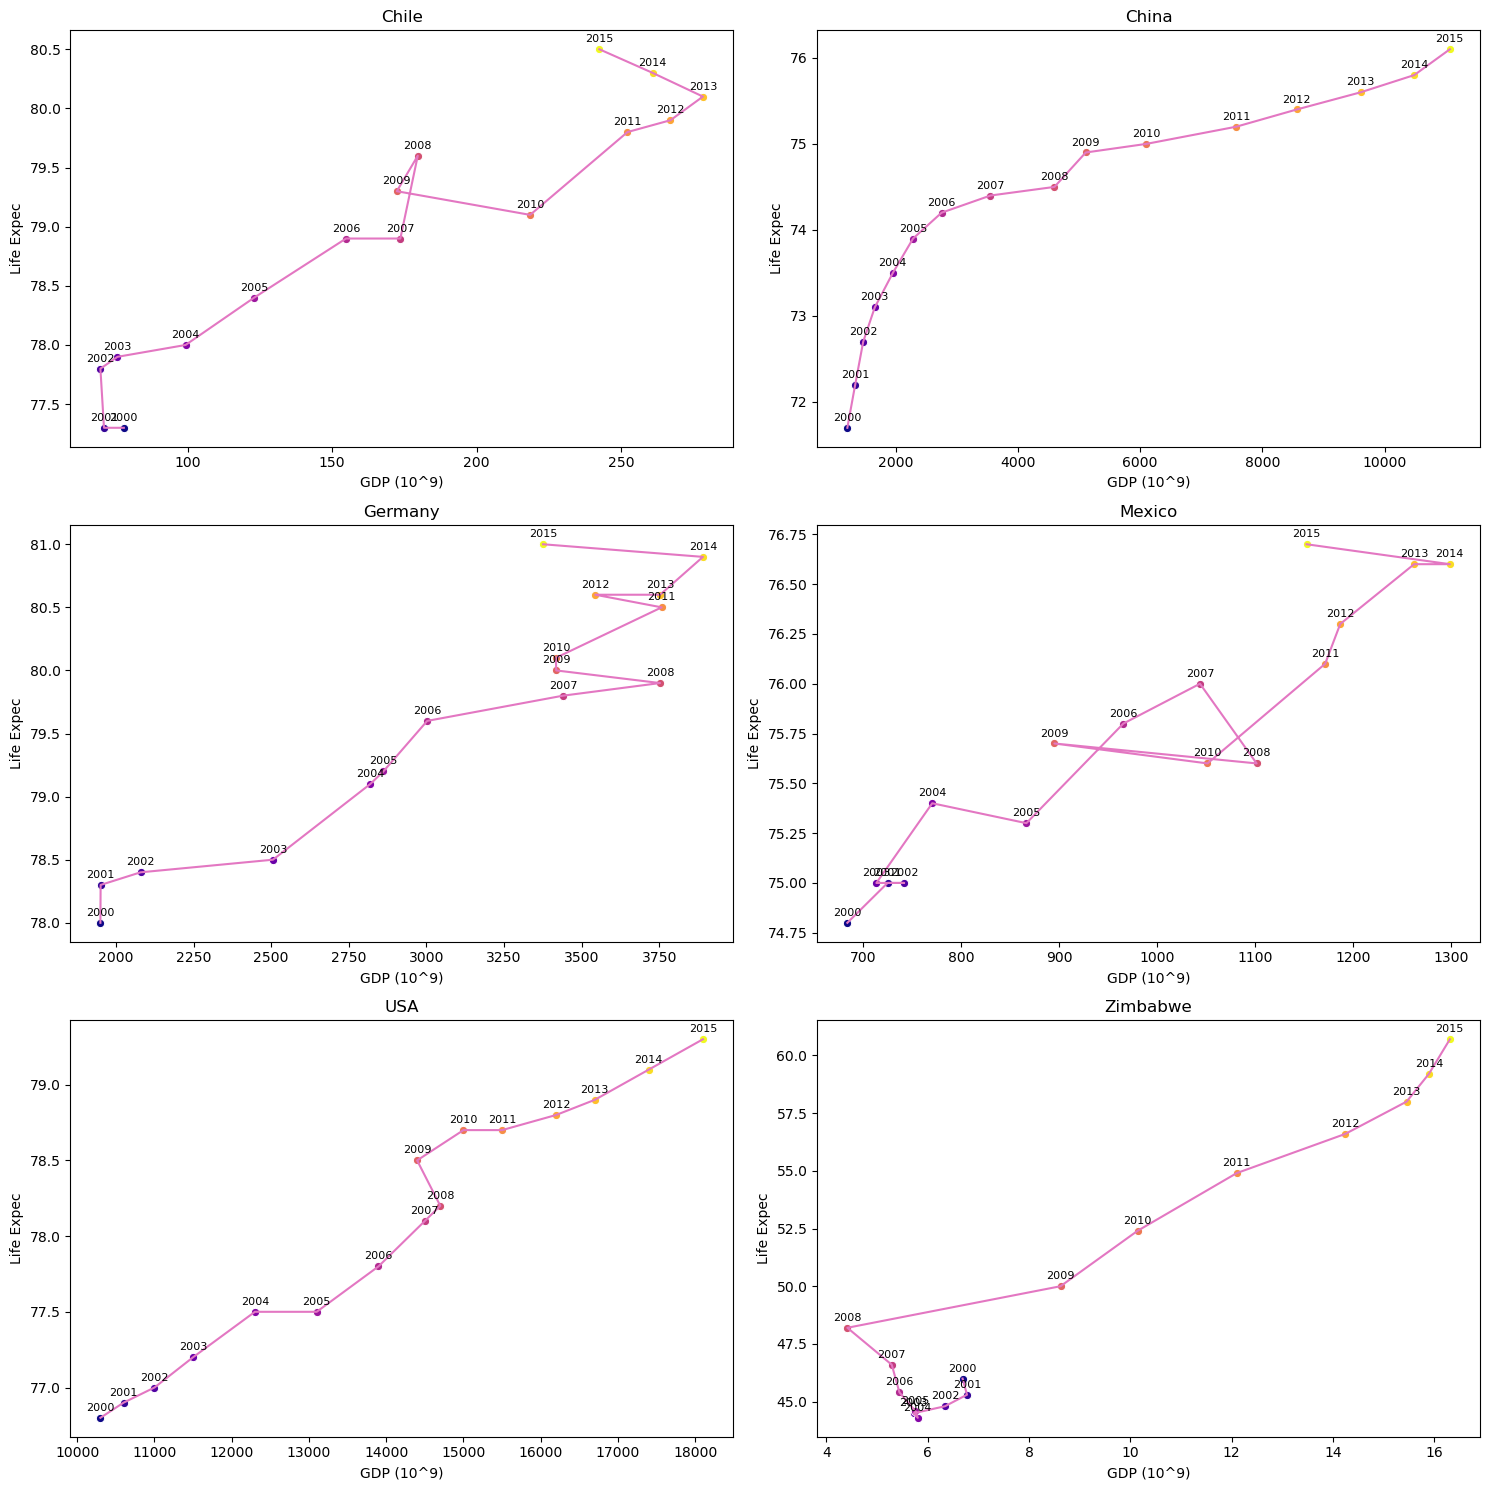

In [71]:

country_data = LE_GDP_data.sort_values("Year")
country_count= LE_GDP_data["Country"].nunique()
country_list = list(LE_GDP_data["Country"].unique())

count=1
plt.figure(figsize=(15,15))
for country in country_list:
    x = LE_GDP_data[LE_GDP_data["Country"]==country]["GDP (10^9)"]
    y = LE_GDP_data[LE_GDP_data["Country"]==country]["Life Expec"]
    z = LE_GDP_data["Year"]
    plt.subplot(3,2,count)
    sns.lineplot(x=x, y=y, hue=z, palette="plasma", data=LE_GDP_data, markers=True, marker="o")
    plt.plot(x, y, "-")
    for i, year in enumerate(years):
        plt.annotate(str(year), 
                    (x.iloc[i], y.iloc[i]),
                    textcoords="offset points", 
                    xytext=(0, 5), 
                    ha='center',  
                    fontsize=8) 
    plt.title(country)
    plt.legend().remove()
    plt.tight_layout()
    count+=1

##### Eveluation: Direct comparison of factors
Of the above graphs all countries so a degree of positive corelation between GDP and Life expectancy. 
The countries with the strongest correlations are USA and China with linear and logarithmic relationships, respectively. 

Chile, Germany, and Mexico each have roughly positive relationships, but their lack of consistent increases GDP has led to a spiderweb which undercuts short term correlation. Germany post-2007 is the best example of this random scatter. 

Zimbabwe is a surprise. Despite uncorrelated data pre-2008, post-2008 is very linear and suggestion a correlation for this section of time.

##### 2008 
Given the global financial crisis in 2008 it is unsurprising that most countries show a noticeable decrease in GDP in the 2009 year, that is except for China whose economy is somewhat removed from the west’s. This explains a little of the irregular criss-crossing present in the graphs. Mexico is a clear example with its 2009 marker struck dramatically at a horizontal to 2008.  

## Conclusion 

Despite some correlation here and there in select countries and time periods there is not enough evidence to link the two scores of GDP and Life Expectancy. It could be inferred that both are influenced by similar factors but are not, themselves, linked. Countries and their populations are complex organisms with many influences like climate, size, economic and physical resources, but also social factors like culture, social values, and diet. I might suggest that these two factors could be used in conjunction with multiple different factors to help estimate other factors.

##### To summarise: 
The link of these two factors is not strong enough to estimate one with the other in all countries. However, the graphs of individual countries suggest there is a correlation between the factros and may allow us to estimate one factor's value with the other for specific countries (in this case, the USA would likely be a good fit to try). However, I believe this is a link by indirect association due to similar direct factors and the direct relationship between them is not strong enough.
